# Training Convolutional Nural Network using large filters

This project uses this model and classifies very well however this may be the case due to the data. For this project we will try to train this on UERD applied stegronography.

https://github.com/BioAITeam/Steganalysis

In [ ]:
## For google colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir("/content/drive/My Drive/SENG474-FinalProject")

Mounted at /content/drive


In [ ]:
import numpy as np
from keras import backend as K

srm_weights = np.load('SRM_Kernels1.npy') 
biasSRM = np.ones(30)
print (srm_weights.shape)

T3 = 3;
def Tanh3(x):
    tanh3 = K.tanh(x)*T3
    return tanh3

(5, 5, 1, 30)


In [ ]:
import tensorflow as tf

def GBRAS_Net():
    tf.keras.backend.clear_session()
    #Inputs
    inputs = tf.keras.Input(shape=(256,256,1), name="input_1")
    inputs = tf.keras.layers.Rescaling(scale=1.0 / 255)(inputs)
    #Layer 1
    layers = tf.keras.layers.Conv2D(30, (5,5), strides=(1,1), padding='same', trainable=False, activation=Tanh3, use_bias=True)(inputs)
    layers1 = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 2
    layers = tf.keras.layers.DepthwiseConv2D(1)(layers1)
    layers = tf.keras.layers.SeparableConv2D(30,(3,3), padding='same', activation="elu",depth_multiplier=3)(layers) 
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 3
    layers = tf.keras.layers.DepthwiseConv2D(1)(layers)
    layers = tf.keras.layers.SeparableConv2D(30,(3,3), padding='same', activation="elu",depth_multiplier=3)(layers) 
    layers2 = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    skip1 =   tf.keras.layers.Add()([layers1, layers2])
    #Layer 4
    layers = tf.keras.layers.Conv2D(30, (3,3), strides=(1,1), activation="elu", padding='same', kernel_initializer='glorot_uniform')(skip1) 
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 5
    layers = tf.keras.layers.Conv2D(30, (3,3), strides=(1,1), activation="elu", padding='same', kernel_initializer='glorot_uniform')(layers)
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 6
    layers = tf.keras.layers.AveragePooling2D((2,2), strides= (2,2))(layers)
    #Layer 7
    layers = tf.keras.layers.Conv2D(60, (3,3), strides=(1,1), activation="elu", padding='same', kernel_initializer='glorot_uniform')(layers) 
    layers3 = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 8
    layers = tf.keras.layers.DepthwiseConv2D(1)(layers3)
    layers = tf.keras.layers.SeparableConv2D(60,(3,3), padding='same', activation="elu",depth_multiplier=3)(layers) 
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 9
    layers = tf.keras.layers.DepthwiseConv2D(1)(layers)
    layers = tf.keras.layers.SeparableConv2D(60,(3,3), padding='same', activation="elu",depth_multiplier=3)(layers) 
    layers4 = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    skip2 =   tf.keras.layers.Add()([layers3, layers4])
    #Layer 10
    layers = tf.keras.layers.Conv2D(60, (3,3), strides=(1,1), activation="elu", padding='same', kernel_initializer='glorot_uniform')(skip2) 
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 11
    layers = tf.keras.layers.AveragePooling2D((2,2), strides= (2,2))(layers)
    #Layer 12
    layers = tf.keras.layers.Conv2D(60, (3,3), strides=(1,1), activation="elu", padding='same', kernel_initializer='glorot_uniform')(layers) 
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 13
    layers = tf.keras.layers.AveragePooling2D((2,2), strides= (2,2))(layers)
    #Layer 14
    layers = tf.keras.layers.Conv2D(60, (3,3), strides=(1,1), activation="elu", padding='same', kernel_initializer='glorot_uniform')(layers) 
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 15
    layers = tf.keras.layers.AveragePooling2D((2,2), strides= (2,2))(layers)
    #Layer 16
    layers = tf.keras.layers.Conv2D(30, (1,1), strides=(1,1), activation="elu", padding='same', kernel_initializer='glorot_uniform')(layers) 
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 17
    layers = tf.keras.layers.Conv2D(2, (1,1), strides=(1,1), activation="elu", padding='same', kernel_initializer='glorot_uniform')(layers) 
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #Layer 18
    layers = tf.keras.layers.GlobalAveragePooling2D(data_format="channels_last")(layers)
    #Layer 19
    predictions = tf.keras.layers.Softmax(axis=1)(layers)
    #Model generation
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    #Optimizer
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    print ("Model GBRAS-Net Generated")
    #Model compilation
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:

model = GBRAS_Net()
model.summary()


Model GBRAS-Net Generated
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 30  780         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 30  90         ['conv2d[1][0]']                 
 alization)                     )                                   

In [ ]:
import pickle

with open("X_256.pickle", 'rb') as pickle_in:
    X = pickle.load(pickle_in)

with open("y_256.pickle", 'rb') as pickle_in:
    y = pickle.load(pickle_in)

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

IMG_SIZE = 256

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y).reshape(-1, 1)

enc = OneHotEncoder()
enc.fit(y)
y = np.array(y)
out = enc.transform(y)

In [ ]:
y = out.toarray()

In [ ]:
y.shape

(10000, 2)

In [ ]:
X.shape

(10000, 256, 256, 1)

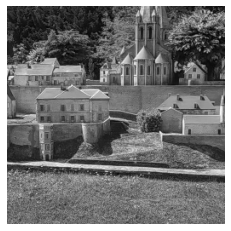

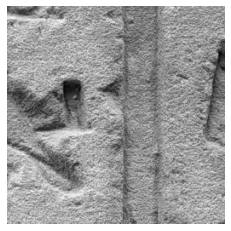

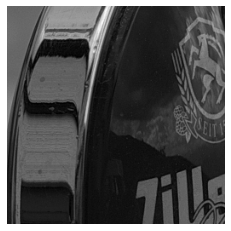

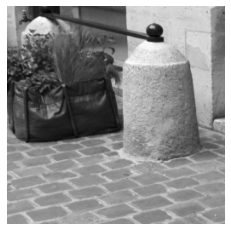

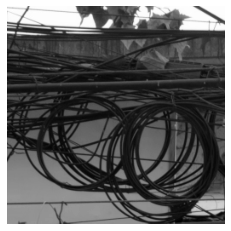

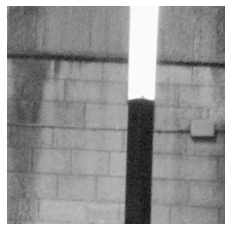

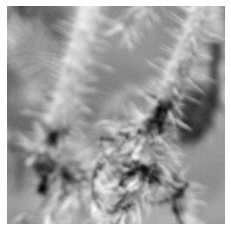

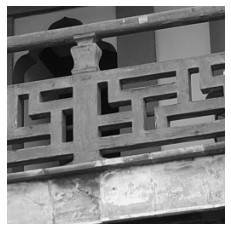

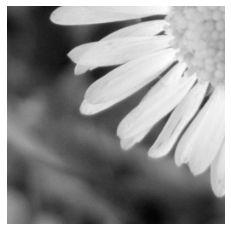

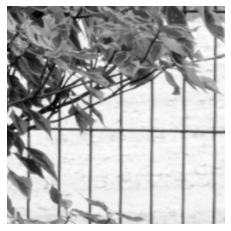

In [ ]:
from matplotlib import pyplot as plt

for i in range(10):
  fig, ax = plt.subplots(1,1)
  ax.imshow(X[i].reshape(256,256), cmap='gray')
  ax.axis('off')

plt.show()

In [ ]:
%%time

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1337)

CPU times: user 181 ms, sys: 17.6 ms, total: 199 ms
Wall time: 245 ms


In [ ]:
X_train.shape

(9000, 256, 256, 1)

In [ ]:
from tensorflow import keras

csv_logger = tf.keras.callbacks.CSVLogger('/content/drive/My Drive/SENG474-FinalProject/log_deep.csv', separator=',', append=True)

early_stopping_callback = keras.callbacks.EarlyStopping(monitor="loss", patience=10)

checkpoint_filepath = "./tmp/checkpoint_deep"

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor="loss",
    mode="min",
    save_best_only=True,
)


callbacks = [csv_logger, early_stopping_callback, model_checkpoint_callback]

In [15]:
%%time

epochs = 100

model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), callbacks = callbacks)

Epoch 1/100
282/282 [==============================] - 438s 2s/step - loss: 0.6959 - accuracy: 0.5034 - val_loss: 0.6968 - val_accuracy: 0.4880
Epoch 2/100
282/282 [==============================] - 441s 2s/step - loss: 0.6938 - accuracy: 0.4987 - val_loss: 0.6926 - val_accuracy: 0.5060
Epoch 3/100
282/282 [==============================] - 447s 2s/step - loss: 0.6937 - accuracy: 0.4927 - val_loss: 0.6935 - val_accuracy: 0.4930
Epoch 4/100
282/282 [==============================] - 443s 2s/step - loss: 0.6934 - accuracy: 0.4940 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 5/100
282/282 [==============================] - 449s 2s/step - loss: 0.6936 - accuracy: 0.4944 - val_loss: 0.6935 - val_accuracy: 0.4920
Epoch 6/100
282/282 [==============================] - 448s 2s/step - loss: 0.6934 - accuracy: 0.4962 - val_loss: 0.6934 - val_accuracy: 0.4820
Epoch 7/100
282/282 [==============================] - 443s 2s/step - loss: 0.6936 - accuracy: 0.4973 - val_loss: 0.6930 - val_accuracy:

In [16]:
checkpoint_filepath = "./tmp/checkpoint_deep"

model.load_weights(checkpoint_filepath)

In [17]:

# Evaluate the model on the test data using `evaluate`
print("Evaluate on train data")
results = model.evaluate(X_train, y_train)
print("train loss, train acc:", results)

# Evaluate the model on the train data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate on train data
282/282 [==============================] - 11s 38ms/step - loss: 0.6934 - accuracy: 0.5014
train loss, train acc: [0.6934142112731934, 0.5014444589614868]
Evaluate on test data
32/32 [==============================] - 1s 37ms/step - loss: 0.6947 - accuracy: 0.4870
test loss, test acc: [0.6946529150009155, 0.4869999885559082]
